In [1]:
%load_ext autoreload
%autoreload 2

from dengai.data import *

In [2]:
dataset = Dataset()

In [3]:
df = dataset.df
df_iq, df_sj = dataset.df_iq, dataset.df_sj

In [4]:
df.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_mi

<Axes: xlabel='week_start_date'>

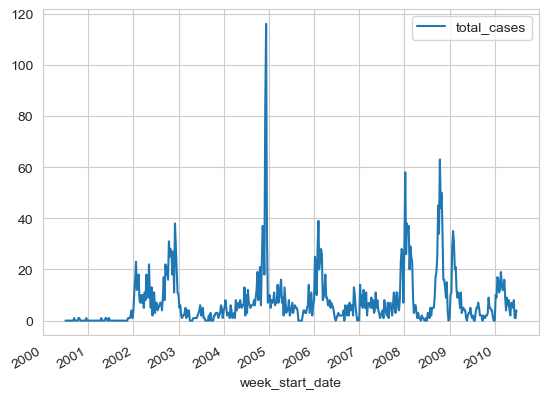

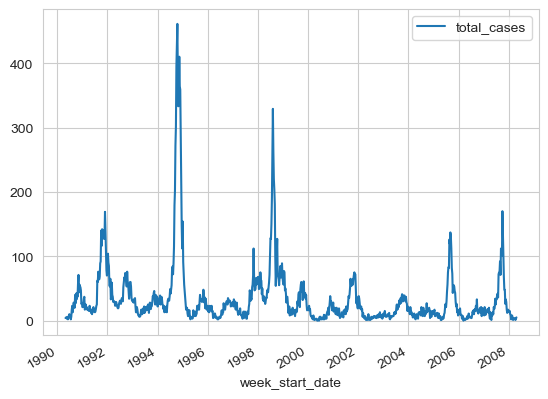

In [5]:
df_iq.plot(x=COL_WEEK_START_DATE, y=COL_TARGET)
df_sj.plot(x=COL_WEEK_START_DATE, y=COL_TARGET)

NOTE: It looks like the Iquitos data prior to 2002 is flawed.

C:\Users\DominikJain\miniconda3\envs\dengai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DominikJain\miniconda3\envs\dengai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DominikJain\miniconda3\envs\dengai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DominikJain\miniconda3\envs\dengai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DominikJain\miniconda3\envs\dengai\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DominikJain\miniconda3\envs\dengai\lib\site-packages\seaborn\axisgrid.p

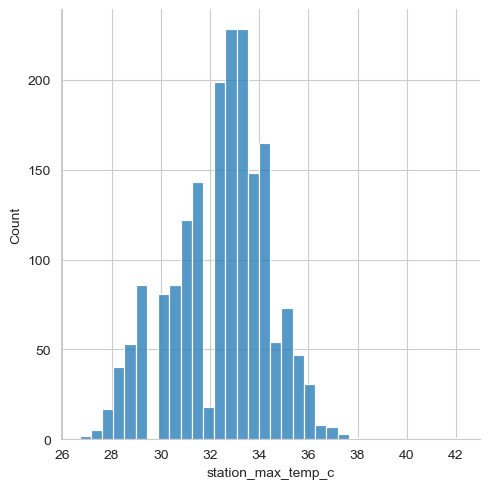

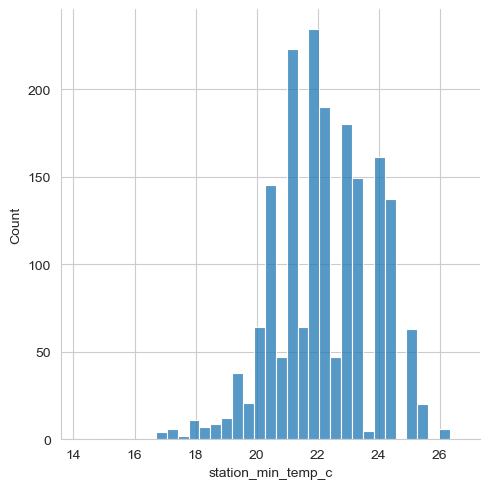

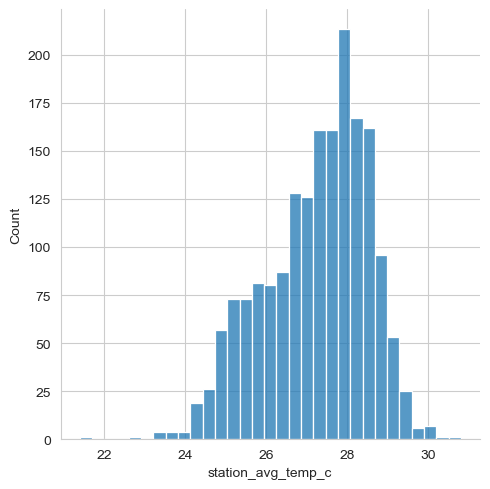

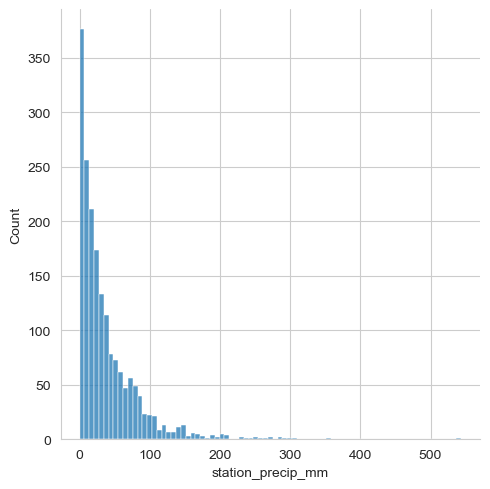

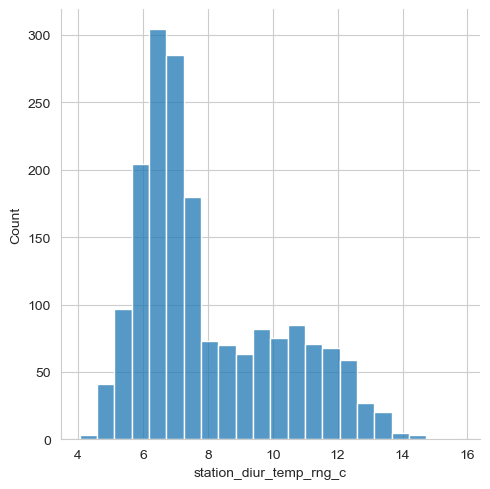

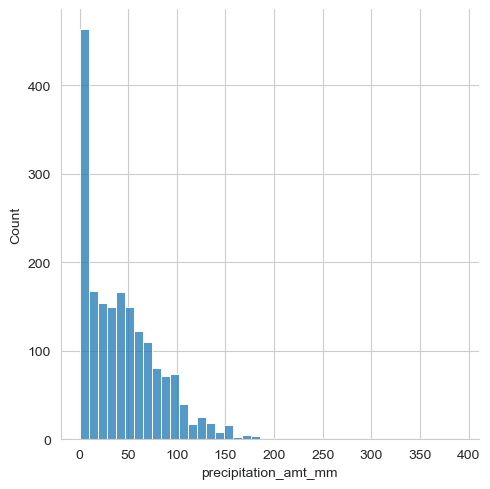

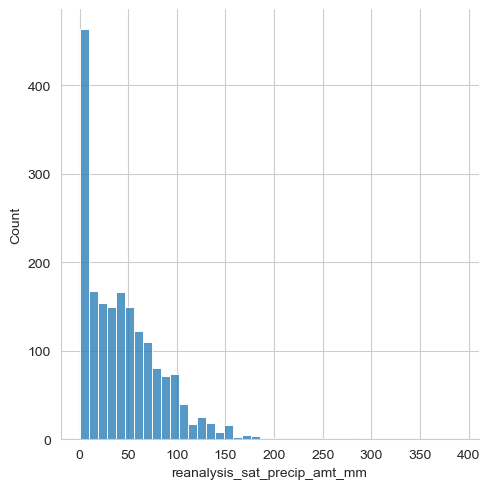

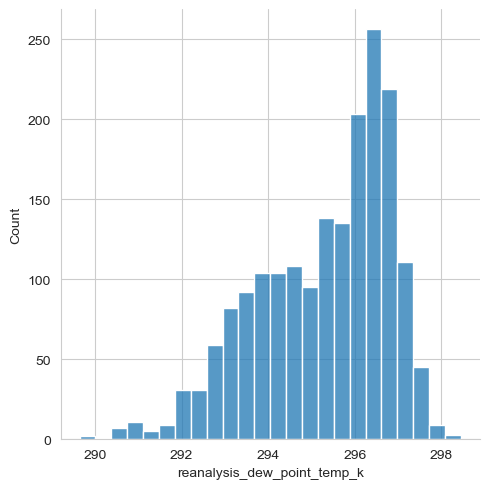

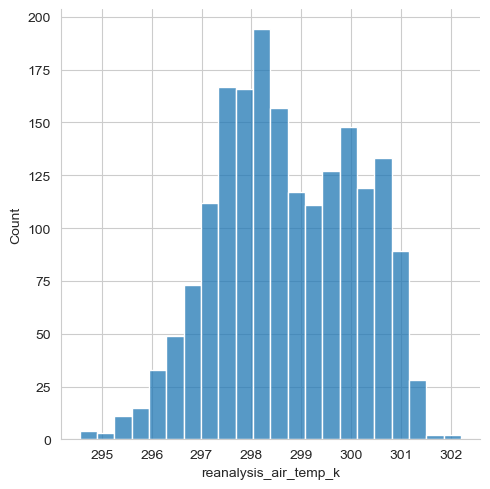

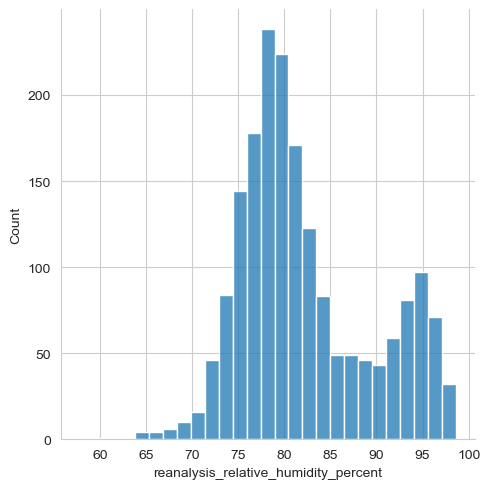

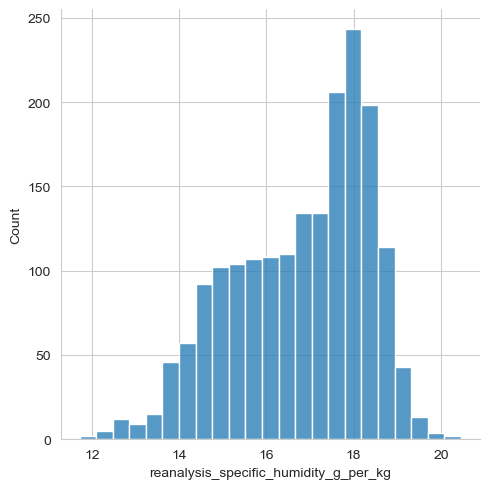

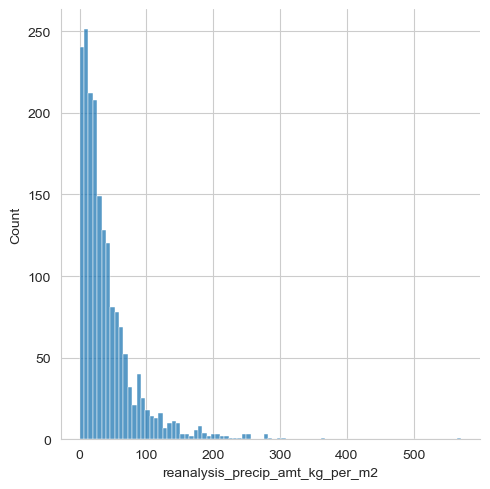

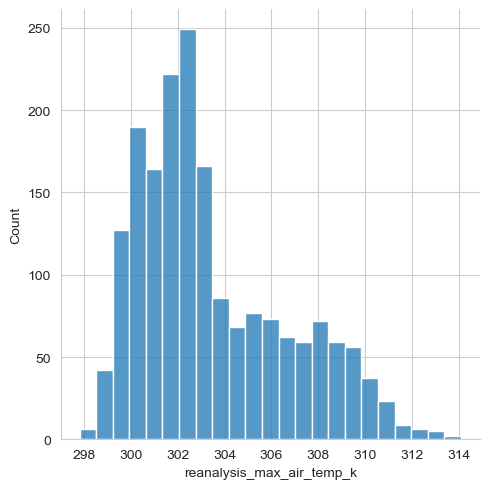

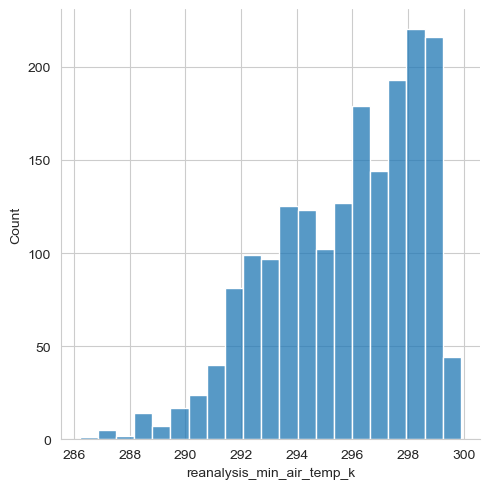

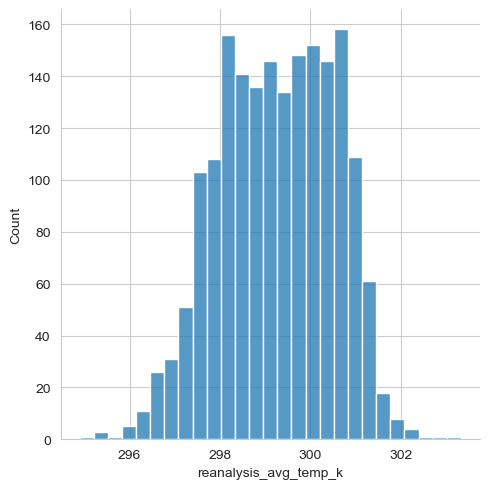

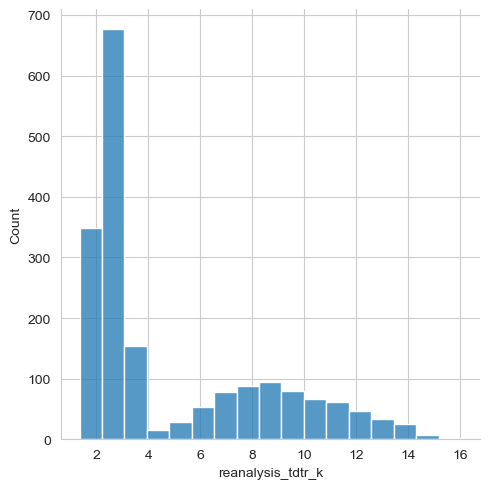

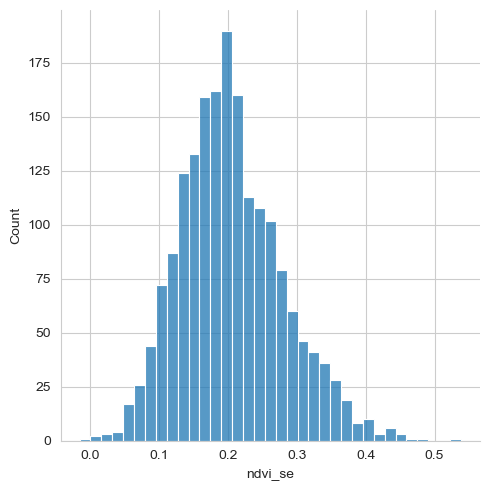

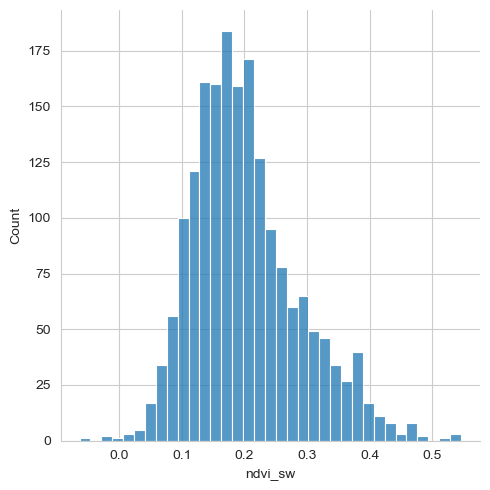

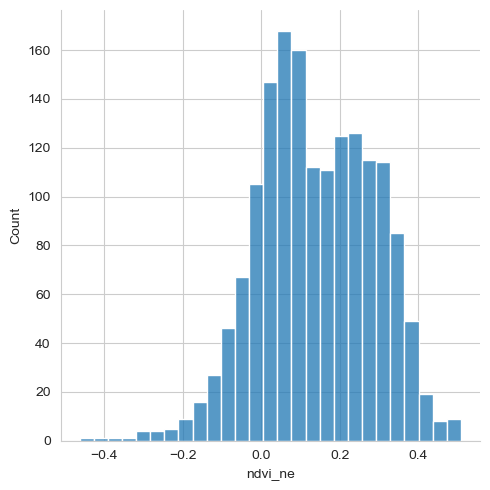

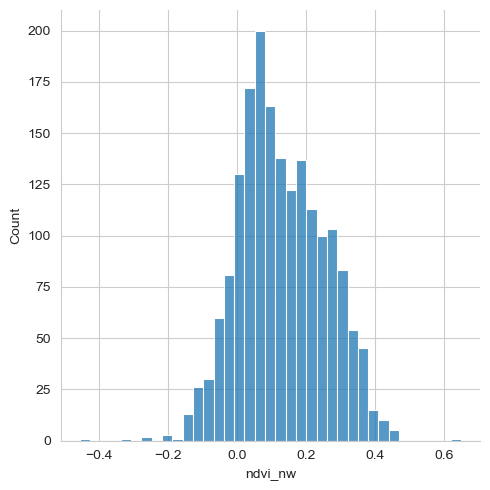

In [6]:
import seaborn as sns
for c in COLS_FEATURES:
    sns.displot(data=df, x=c)

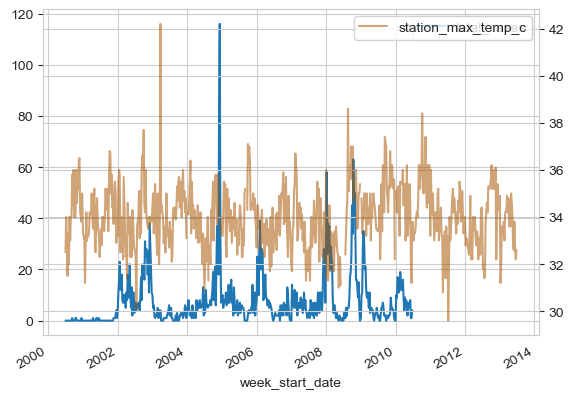

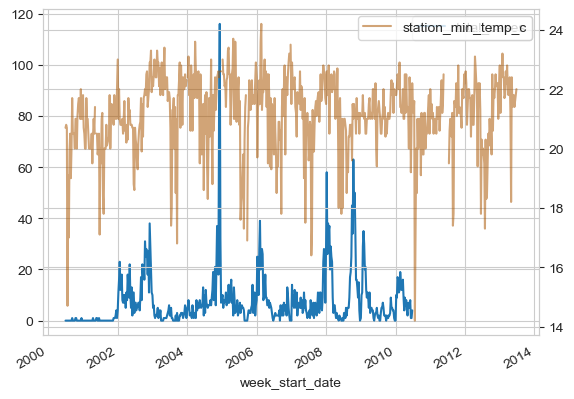

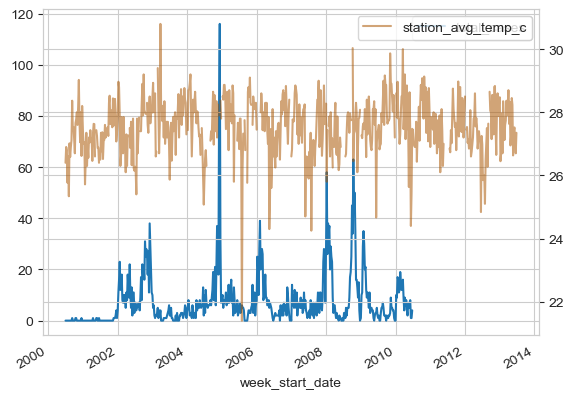

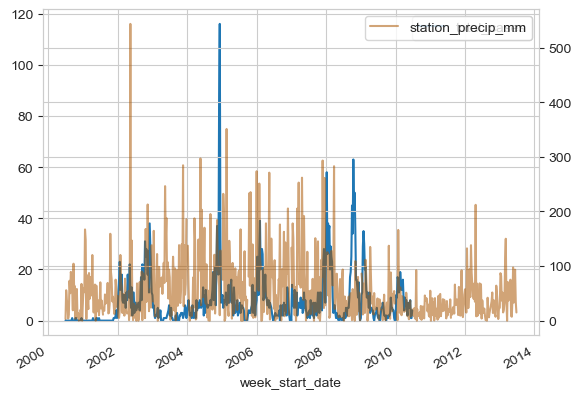

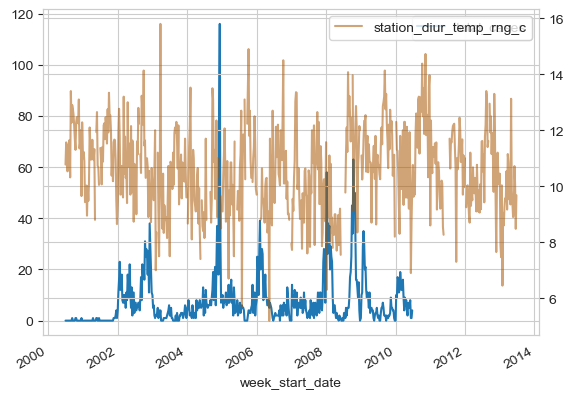

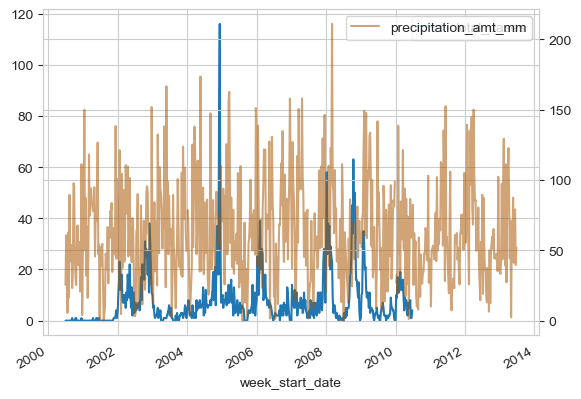

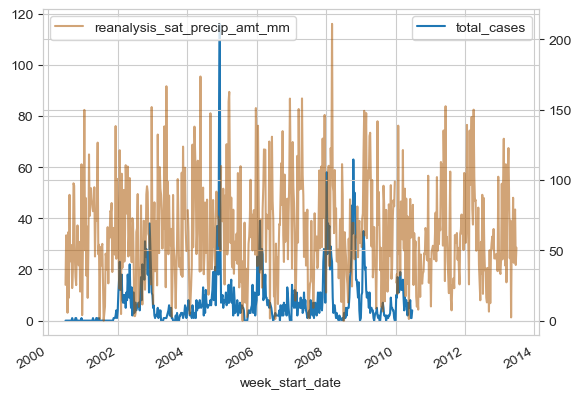

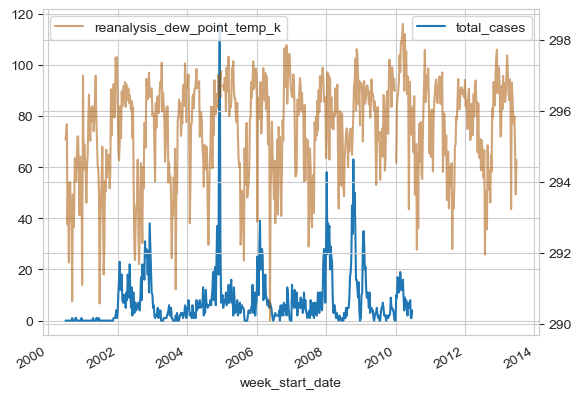

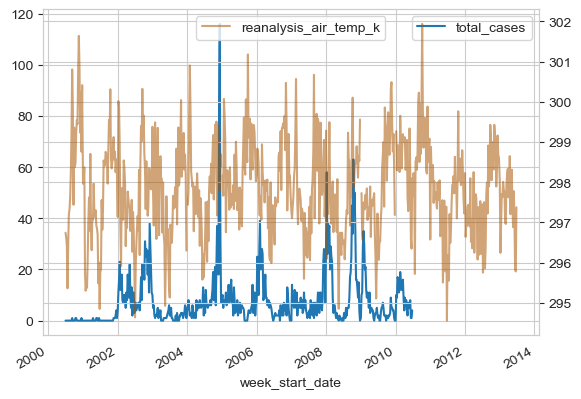

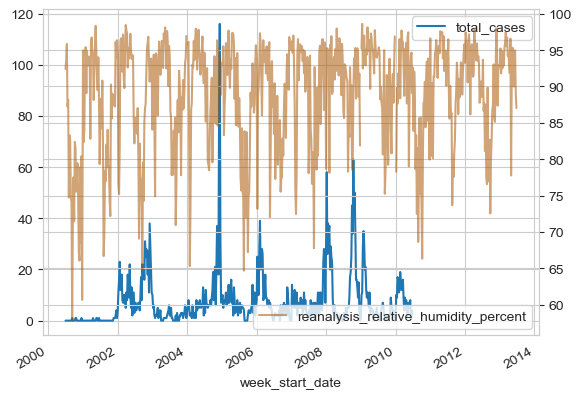

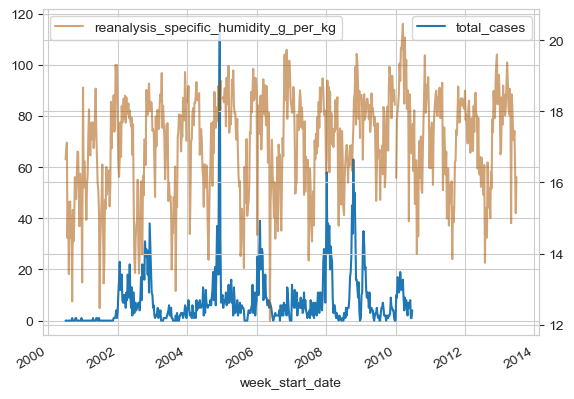

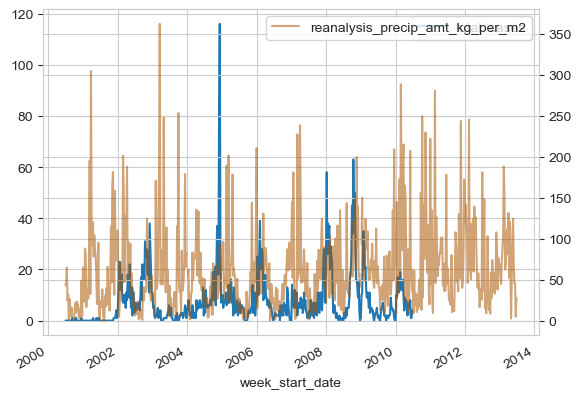

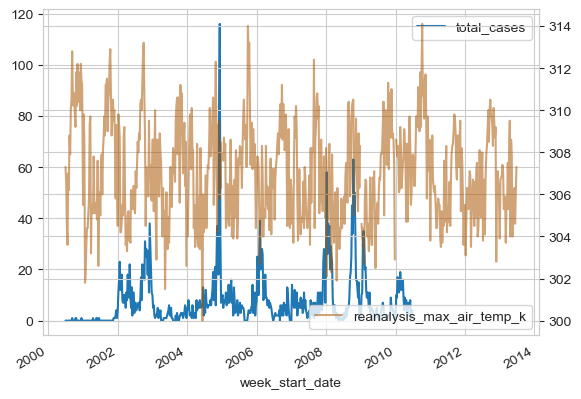

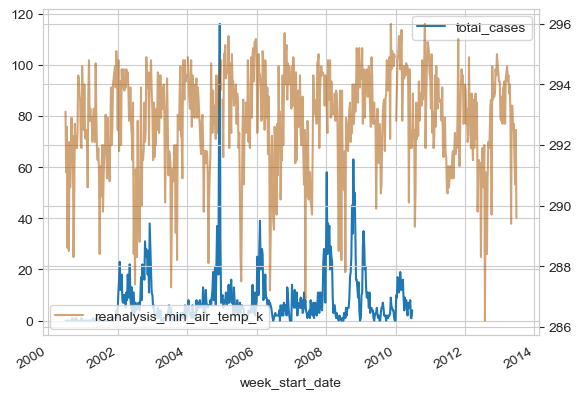

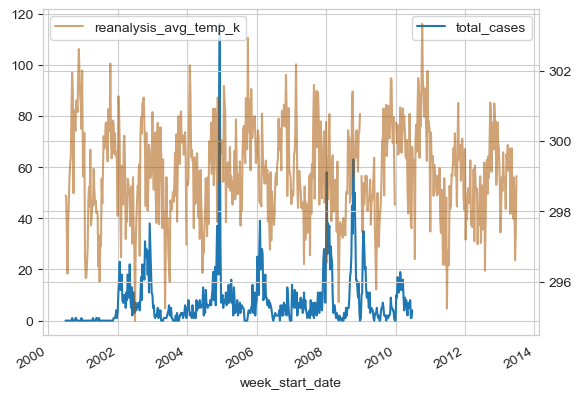

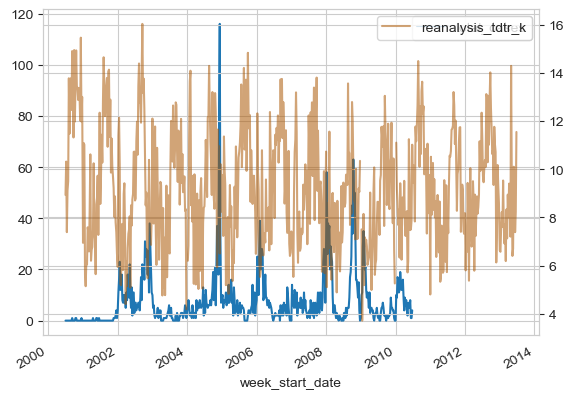

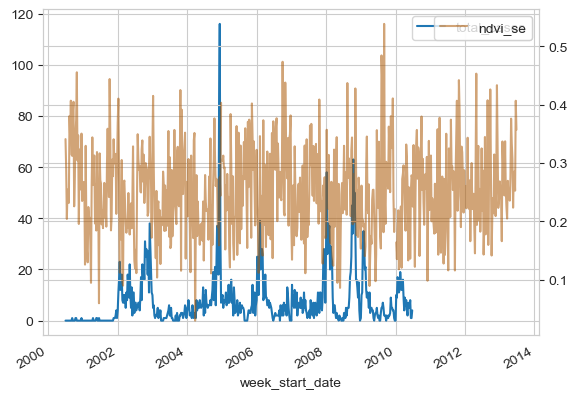

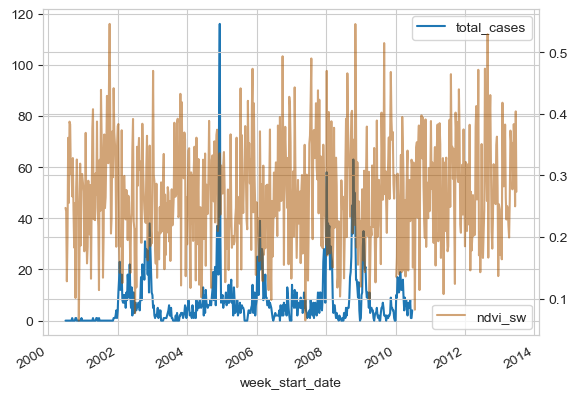

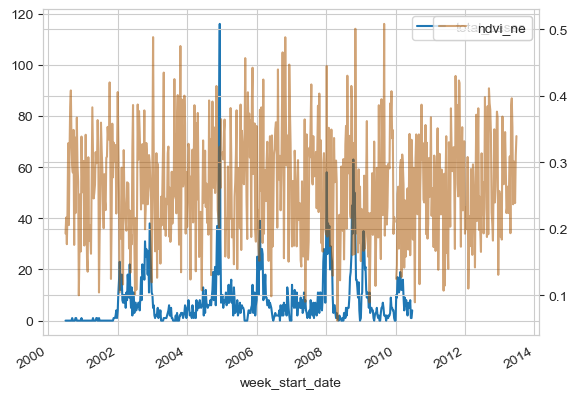

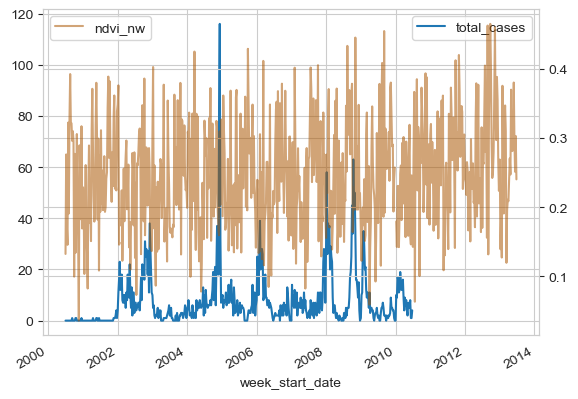

In [11]:
for c in COLS_FEATURES:
    ax = df_iq.plot(x=COL_WEEK_START_DATE, y=COL_TARGET)
    df_iq.plot(x=COL_WEEK_START_DATE, y=c, ax=ax.twinx(), c="#aa550088")

In [21]:
def lagged_correlations(df, max_lag):
    return pd.DataFrame.from_dict(
        {x: [df[COL_TARGET].corr(df[x].shift(-t)) for t in range(max_lag+1)] for x in COLS_FEATURES})
    
lagged_correlations(df_iq, 8)

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_precip_mm,station_diur_temp_rng_c,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_dew_point_temp_k,reanalysis_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
0,0.075279,0.211702,0.113070,0.042976,-0.058230,0.090171,0.090171,0.230401,0.097098,0.130083,0.236476,0.101171,-0.056474,0.214514,0.079872,-0.134425,-0.041067,0.032999,0.020215,-0.009586
1,0.044967,0.211177,0.104548,0.093426,-0.083947,0.125996,0.125996,0.273006,0.085112,0.172959,0.281101,0.110917,-0.068858,0.220019,0.075159,-0.151779,-0.051156,-0.021661,-0.008529,-0.038200
2,0.008211,0.214703,0.116686,0.050036,-0.084740,0.138774,0.138774,0.278538,0.071123,0.188278,0.287082,0.107484,-0.084575,0.233470,0.065361,-0.168602,-0.055266,-0.045039,-0.037245,-0.044821
3,-0.033225,0.226510,0.068458,0.096129,-0.141336,0.154550,0.154550,0.316042,0.052015,0.232489,0.323679,0.150713,-0.129535,0.239341,0.043853,-0.207594,-0.027706,0.000721,0.016771,-0.009288
4,-0.040664,0.203024,0.077881,0.062992,-0.126618,0.112311,0.112311,0.282566,0.049312,0.207347,0.289669,0.123296,-0.108065,0.213643,0.056184,-0.173838,-0.048618,-0.043703,-0.028570,-0.067982
5,-0.075318,0.227928,0.068676,0.099698,-0.160208,0.125317,0.125317,0.287285,0.012743,0.233717,0.294210,0.154732,-0.141709,0.192671,0.014499,-0.213775,-0.041393,-0.041231,-0.024761,-0.016291
6,-0.067048,0.217538,0.072845,0.131390,-0.137087,0.148583,0.148583,0.271994,0.029769,0.206826,0.277832,0.100821,-0.139575,0.193179,0.024886,-0.187961,-0.058371,-0.061431,-0.039912,-0.015861
7,-0.075707,0.190215,0.057694,0.045916,-0.122819,0.088308,0.088308,0.234052,0.029828,0.174960,0.241168,0.076922,-0.153664,0.184693,0.023667,-0.165388,-0.074527,-0.084462,-0.060560,-0.037703
8,-0.084085,0.188249,0.042049,0.013774,-0.162148,0.119178,0.119178,0.226745,0.005398,0.185177,0.231639,0.066094,-0.155861,0.182844,0.001047,-0.185797,-0.127096,-0.150034,-0.118949,-0.095510


In [22]:
lagged_correlations(df_sj, 8)

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_precip_mm,station_diur_temp_rng_c,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_dew_point_temp_k,reanalysis_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
0,0.189901,0.177012,0.196617,0.051759,0.034630,0.060211,0.060211,0.203774,0.181917,0.144045,0.207947,0.107457,0.194532,0.187943,0.175267,-0.067600,0.001113,-0.000333,0.037639,0.075307
1,0.162878,0.142917,0.161135,0.046117,0.041811,0.045910,0.045910,0.173224,0.150842,0.129085,0.177260,0.101659,0.162360,0.160299,0.144233,-0.076799,-0.004761,-0.002942,0.041123,0.066731
2,0.133076,0.104494,0.120340,0.059218,0.054005,0.037490,0.037490,0.137591,0.110540,0.118634,0.141874,0.099007,0.119837,0.124852,0.103817,-0.086207,-0.016334,-0.018851,0.044404,0.057947
3,0.095389,0.061008,0.075798,0.070727,0.052235,0.044117,0.044117,0.104958,0.070264,0.114727,0.109216,0.098935,0.078449,0.086789,0.064067,-0.097819,-0.020883,-0.022959,0.038974,0.035358
4,0.061942,0.018889,0.033268,0.082058,0.059824,0.049555,0.049555,0.074424,0.031346,0.113228,0.078455,0.099295,0.040211,0.047449,0.025607,-0.099464,-0.016952,-0.028363,0.042456,0.045405
5,0.035191,-0.015761,-0.003189,0.066061,0.071265,0.029974,0.029974,0.040923,-0.001615,0.094865,0.044457,0.076004,0.009837,0.013008,-0.005976,-0.102407,0.002094,-0.015591,0.036047,0.037189
6,0.000917,-0.057626,-0.047735,0.067955,0.074676,0.021254,0.021254,0.001887,-0.046819,0.085099,0.004866,0.069192,-0.036309,-0.027656,-0.050754,-0.109374,0.018032,0.002590,0.041193,0.036400
7,-0.033656,-0.096191,-0.089366,0.053376,0.072971,0.003778,0.003778,-0.040226,-0.088452,0.062503,-0.038023,0.059995,-0.081864,-0.069696,-0.091382,-0.117422,0.023458,0.010751,0.037332,0.038844
8,-0.068179,-0.140209,-0.132138,0.042250,0.078140,-0.007533,-0.007533,-0.085822,-0.133895,0.039161,-0.084173,0.050671,-0.128965,-0.114930,-0.135738,-0.121490,0.013130,0.009482,0.019928,0.028750
